In [214]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
file_path = 'Sleep_Survey.csv'
df = pd.read_csv(file_path)

# Dropping two columns
columns_to_drop = ['Timestamp', 'If you are presented with a device which would help to address your current difficulties in sleeping, how much would you be willing to pay?']
df.drop(columns=columns_to_drop, inplace=True)

column_to_clean = ['Please select any common factors that disturb your sleep', 
'Have you made any efforts to improve your sleep quality or reduce sleeplessness? (Select all that apply)', 
'What do you believe is the primary reason for your sleeplessness? (Select the most relevant option)', 
]

# Apply replacements using lambda function for case-insensitive matching and stripping whitespace
df[column_to_clean[0]] = df[column_to_clean[0]].apply(lambda x: 'None of the above' if str(x).strip().lower() in ['no disturbance', 'nothing', 'nan', 'none', '--', 'i sleep well'] else x)
df[column_to_clean[1]] = df[column_to_clean[1]].apply(lambda x: 'None of the above' if str(x).strip().lower() in ['no efforts made', "haven't faced sleeplessness as of now.", 'i already have good sleep quality', 'no as there is no sleeplessness', '--', "haven't", "none of the above", 'nan', 'nothing', 'no', 'nope'] else x)
df[column_to_clean[2]] = df[column_to_clean[2]].apply(lambda x: 'None of the above' if str(x).strip().lower() in ['no', "i don't have sleeplessness", "I don't have sleeplessness", "haven't faced sleeplessness as of now. but work related factors probably don't let me sleep.", 'none', '--', 'no sleeplessness'] else x)

# counts = df['What do you believe is the primary reason for your sleeplessness? (Select the most relevant option)'].value_counts
# print(counts)

df['Do you have any known sleep disorders?'] = df['Do you have any known sleep disorders?'].fillna('Yes')

# Save the modified DataFrame to a new CSV file
modified_file_path = 'new.csv'
df.to_csv(modified_file_path, index=False)

In [227]:
# Load the CSV file into a Pandas DataFrame
file_path = 'new.csv'  
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   Gender                                                                                                    108 non-null    object
 1   Do you have any known sleep disorders?                                                                    108 non-null    object
 2   Daily sleep duration                                                                                      108 non-null    object
 3   Rate the quality of your sleep                                                                            108 non-null    int64 
 4   Please select any common factors that disturb your sleep                               

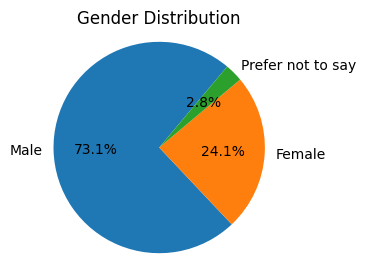

In [228]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

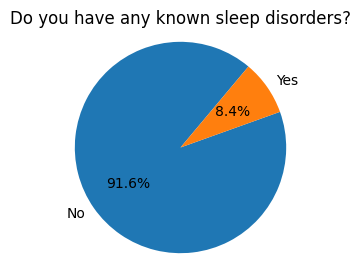

In [157]:
counts = df['Do you have any known sleep disorders?'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Do you have any known sleep disorders?')

# Show the pie chart
plt.show()


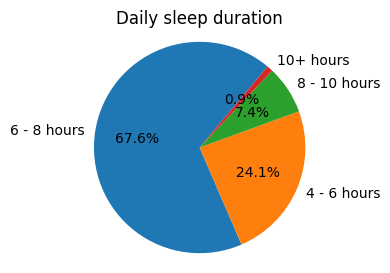

In [158]:
counts = df['Daily sleep duration'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Daily sleep duration')

# Show the pie chart
plt.show()


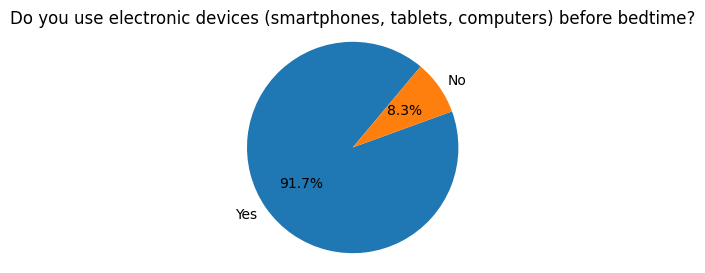

In [159]:
counts = df['Do you use electronic devices (smartphones, tablets, computers) before bedtime?'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50)
plt.axis('equal') 
plt.title('Do you use electronic devices (smartphones, tablets, computers) before bedtime?')

# Show the pie chart
plt.show()

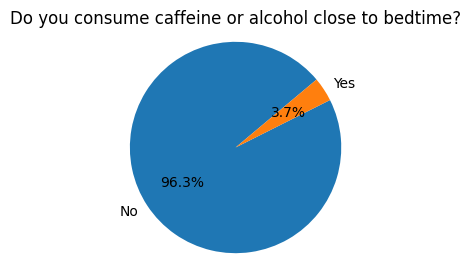

In [160]:
counts = df[' Do you consume caffeine or alcohol close to bedtime? '].value_counts()

# Plotting a pie chart
plt.figure(figsize=(3, 3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=40)
plt.axis('equal') 
plt.title('Do you consume caffeine or alcohol close to bedtime?')

# Show the pie chart
plt.show()

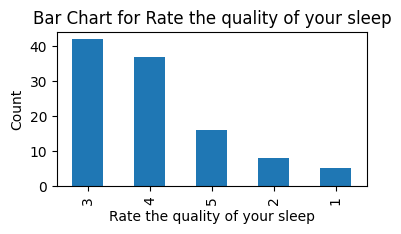

In [161]:
column_for_bar_chart = 'Rate the quality of your sleep'
# Get value counts for the column
value_counts = df[column_for_bar_chart].value_counts()

# Plotting a bar chart
plt.figure(figsize=(4, 2))
value_counts.plot(kind='bar')
plt.title('Bar Chart for ' + column_for_bar_chart)
plt.xlabel(column_for_bar_chart)
plt.ylabel('Count')
plt.show()


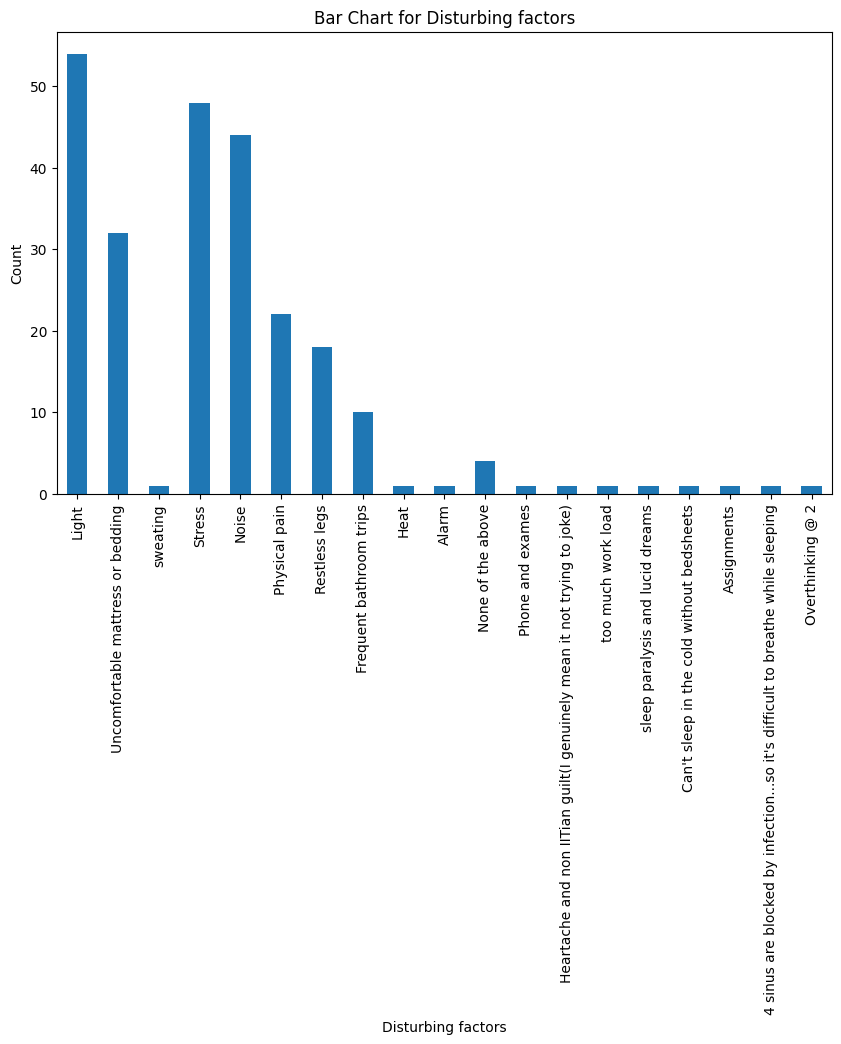

In [230]:
disturbing_factors = pd.DataFrame()
for i in df['Please select any common factors that disturb your sleep']:
    series = pd.Series()
    values = str(i).split(", ")
    cleaned_values = [value.strip() for value in values]
    for value in cleaned_values:
        series[value] = 1
    disturbing_factors = disturbing_factors._append(series, ignore_index=True)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
disturbing_factors.sum().plot(kind='bar')
# plt.xticks(rotation = 75)
plt.title('Bar Chart for ' + "Disturbing factors")
plt.xlabel("Disturbing factors")
plt.ylabel('Count', )
plt.show()

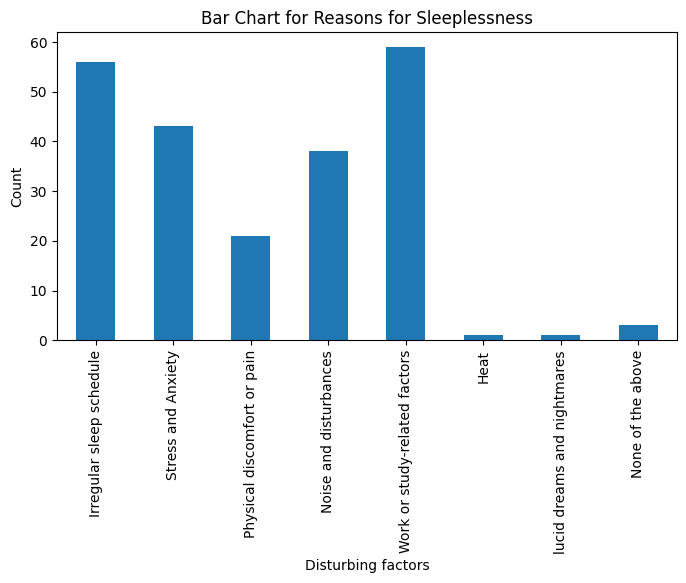

In [229]:
reasons = pd.DataFrame()
for i in df['What do you believe is the primary reason for your sleeplessness? (Select the most relevant option)']:
    series = pd.Series()
    values = str(i).split(", ")
    cleaned_values = [value.strip() for value in values]
    for value in cleaned_values:
        series[value] = 1
    reasons = reasons._append(series, ignore_index=True)

# Plotting a bar chart
plt.figure(figsize=(8, 4))
reasons.sum().plot(kind='bar')
# plt.xticks(rotation = 75)
plt.title('Bar Chart for ' + "Reasons for Sleeplessness")
plt.xlabel("Disturbing factors")
plt.ylabel('Count', )
plt.show()

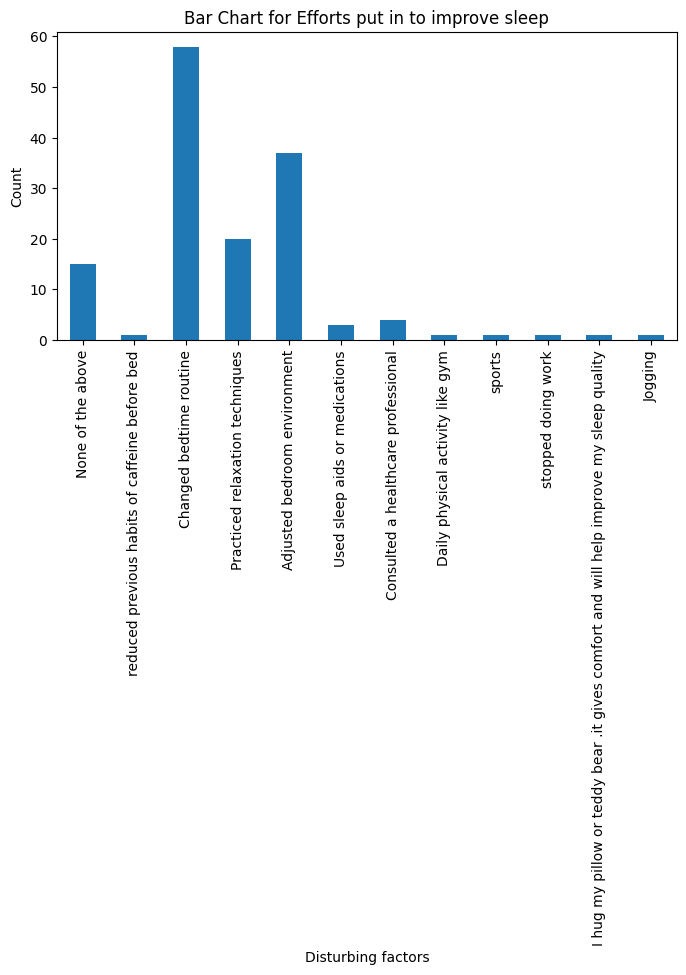

In [231]:
efforts = pd.DataFrame()
for i in df['Have you made any efforts to improve your sleep quality or reduce sleeplessness? (Select all that apply)']:
    series = pd.Series()
    values = str(i).split(", ")
    cleaned_values = [value.strip() for value in values]
    for value in cleaned_values:
        series[value] = 1
    efforts = efforts._append(series, ignore_index=True)

# Plotting a bar chart
plt.figure(figsize=(8, 4))
efforts.sum().plot(kind='bar')
# plt.xticks(rotation = 75)
plt.title('Bar Chart for ' + "Efforts put in to improve sleep")
plt.xlabel("Disturbing factors")
plt.ylabel('Count', )
plt.show()

In [219]:
# we'll translate some of the above features to binary
# Daily sleep duration -> "good sleep duration (6-10)", "bad sleep duration(<6 and >10)"
# Rate the quality of your sleep -> "good quality (3-5)", "bad quality (1-2)"

sleep_dur = pd.Series()
for i in range(len(df['Daily sleep duration'])):
    val = df['Daily sleep duration'][i]
    if not(val == '4 - 6 hours' or val == '10+ hours'):
        sleep_dur[i] = 1
    else:
        sleep_dur[i] = 0

sleep_qual = pd.Series()
for i in range(len(df['Rate the quality of your sleep'])):
    val = df['Rate the quality of your sleep'][i]
    if not(val == 1 or val == 2):
        sleep_qual[i] = 1
    else:
        sleep_qual[i] = 0
sleep_qual.sum()

effort_bi = pd.Series()
for i in range(len(df['Have you made any efforts to improve your sleep quality or reduce sleeplessness? (Select all that apply)'])):
    val = df['Have you made any efforts to improve your sleep quality or reduce sleeplessness? (Select all that apply)'][i]
    if val == "None of the above":
        effort_bi[i] = 0
    else:
        effort_bi[i] = 1

elect_use = pd.Series()
for i in range(len(df['Do you use electronic devices (smartphones, tablets, computers) before bedtime?'])):
    val = df['Do you use electronic devices (smartphones, tablets, computers) before bedtime?'][i]
    if val == 'Yes':
        elect_use[i] = 1
    elif val == 'No':
        elect_use[i] = 0

caff_use = pd.Series()
for i in range(len(df[' Do you consume caffeine or alcohol close to bedtime? '])):
    val = df[' Do you consume caffeine or alcohol close to bedtime? '][i]
    if val == 'Yes':
        caff_use[i] = 1
    elif val == 'No':
        caff_use[i] = 0

sleep_dis = pd.Series()
for i in range(len(df['Do you have any known sleep disorders?'])):
    val = df['Do you have any known sleep disorders?'][i]
    if val == 'Yes':
        sleep_dis[i] = 1
    elif val == 'No':
        sleep_dis[i] = 0

gender = pd.Series()
for i in range(len(df['Gender'])):
    val = df['Gender'][i]
    if val == 'Male':
        gender[i] = 1
    elif val == 'Female':
        gender[i] = 2
    elif val == 'Prefer not to say':
        gender[i] = 3

In [220]:
cleaned = pd.DataFrame()

# for i in len(df['Gender'])
cleaned['gender'] = gender
cleaned['sleep_disorders'] = sleep_dis
cleaned['sleep_duration'] = sleep_dur
cleaned['sleep_quality'] = sleep_qual
cleaned['electronic_usage'] = elect_use
cleaned['caffeine'] = caff_use
cleaned['effort'] = effort_bi

counts = cleaned['sleep_disorders'].value_counts()
print(counts)

# cleaned_disorder_yes = cleaned[cleaned['sleep_disorders'] == 1]
# cleaned_disorder_yes
cleaned.describe()

sleep_disorders
0    98
1    10
Name: count, dtype: int64


,gender,sleep_disorders,sleep_duration,sleep_quality,electronic_usage,caffeine,effort
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.296296,0.092593,0.750000,0.879630,0.916667,0.037037,0.870370
std,0.516264,0.291212,0.435031,0.326911,0.277674,0.189733,0.337461
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.750000,1.000000,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
for i in cleaned.keys():
    print(f"{i} : {cleaned[i].std()}")

gender : 0.5162637024365011
sleep_disorders : 0.2912120028412688
sleep_duration : 0.4350314200705486
sleep_quality : 0.3269111340734205
electronic_usage : 0.2776739162008519
caffeine : 0.18973301093343709
effort : 0.33746145761488444


In [189]:
import numpy as np
from scipy.stats import pointbiserialr

# mapping gender types to a numeric value
# cleaned['gender'] = cleaned['gender'].map({'Male': 0, 'Female': 1, 'Prefer not to say': 2})

# converting sleep disorder column to integers for correct comparision
# cleaned['sleep_disorders'] = df['Do you have any known sleep disorders?'].map({'Yes': 1, 'No': 0})
corr_dis = pd.Series()
for i in range(len(cleaned['sleep_disorders'])):
    val = cleaned['sleep_disorders'][i]
    if val  == 'Yes':
        corr_dis[i] = 1
    else:
        corr_dis[i] = 0

# cleaned[cleaned['sleep_disorders'] == 'Yes'] = 1

corr_gender = pd.Series()
for i in range(len(cleaned['gender'])):
    val = cleaned['gender'][i]
    if val  == 'Male':
        corr_gender[i] = 1
    elif val == 'Female':
        corr_gender[i] = 0
    else:
        corr_gender[i] = -1

print(corr_dis)
print(corr_gender)

# # print(cleaned['sleep_disorders'].value_counts())

# # calculating correlation
# correlation, _ = pointbiserialr(corr_dis, corr_gender)

# print(f"Correlation Coefficient of Gender & Sleep disorders: {correlation}\n")
# print(f"{correlation} is a moderate positive linear relationship.")

covar = corr_gender.cov(corr_dis)
print(covar)

0      0
1      0
2      0
3      0
4      0
      ..
103    0
104    0
105    0
106    0
107    0
Length: 108, dtype: int64
0      1
1      0
2      0
3     -1
4      0
      ..
103    1
104    1
105    1
106    0
107    1
Length: 108, dtype: int64
0.0
